# PART1: EDA

## **下載kaggle資料集**

In [ ]:
# get data from kaggle
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d wkirgsn/electric-motor-temperature

 93% 108M/117M [00:01<00:00, 102MB/s]  
100% 117M/117M [00:01<00:00, 109MB/s]


In [ ]:
! unzip electric-motor-temperature.zip

Archive:  electric-motor-temperature.zip
  inflating: measures_v2.csv         


### **確認檔案是否成功下載**

In [ ]:
ls

electric-motor-temperature.zip  kaggle.json  measures_v2.csv  sample_data/


In [ ]:
import pandas as pd
df = pd.read_csv("measures_v2.csv")
df

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,1.871008e-01,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,2.454175e-01,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,1.766153e-01,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,2.383027e-01,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,2.081967e-01,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330811,-2.152128,30.721298,45.274497,0.791801,41.934347,0.000380,-2.000169,1.097528,62.147780,38.653720,23.989078,-8.116730e-60,71
1330812,-2.258684,30.721306,45.239017,0.778900,41.868923,0.002985,-2.000499,1.097569,62.142646,38.656328,23.970700,-5.815891e-60,71
1330813,-2.130312,30.721312,45.211576,0.804914,41.804819,0.002301,-1.999268,1.098765,62.138387,38.650923,23.977234,-4.167268e-60,71
1330814,-2.268498,30.721316,45.193508,0.763091,41.762220,0.005662,-2.000999,1.095696,62.133422,38.655686,24.001421,-2.985978e-60,71


## **檔案成功下載後，開始進行初步EDA**

In [ ]:
df.describe()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
count,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06
mean,5.427900e+01,3.622999e+01,6.634275e+01,-2.513381e+01,5.687858e+01,2.202081e+03,-6.871681e+01,3.741278e+01,5.850678e+01,4.818796e+01,2.456526e+01,3.110603e+01,4.079306e+01
std,4.417323e+01,2.178615e+01,2.867206e+01,6.309197e+01,2.295223e+01,1.859663e+03,6.493323e+01,9.218188e+01,1.900150e+01,1.999100e+01,1.929522e+00,7.713575e+01,2.504549e+01
min,-2.529093e+01,1.062375e+01,1.858582e+01,-1.315304e+02,1.813398e+01,-2.755491e+02,-2.780036e+02,-2.934268e+02,2.085696e+01,1.807669e+01,8.783478e+00,-2.464667e+02,2.000000e+00
25%,1.206992e+01,1.869814e+01,4.278796e+01,-7.869090e+01,3.841601e+01,3.171107e+02,-1.154061e+02,1.095863e+00,4.315158e+01,3.199033e+01,2.318480e+01,-1.374265e-01,1.700000e+01
50%,4.893818e+01,2.690014e+01,6.511013e+01,-7.429755e+00,5.603635e+01,1.999977e+03,-5.109376e+01,1.577401e+01,6.026629e+01,4.562551e+01,2.479733e+01,1.086035e+01,4.300000e+01
75%,9.003439e+01,4.985749e+01,8.814114e+01,1.470271e+00,7.558668e+01,3.760639e+03,-2.979688e+00,1.006121e+02,7.200837e+01,6.146083e+01,2.621702e+01,9.159718e+01,6.500000e+01
max,1.330370e+02,1.015985e+02,1.413629e+02,1.314698e+02,1.119464e+02,6.000015e+03,5.189670e-02,3.017079e+02,1.136066e+02,1.011480e+02,3.071420e+01,2.610057e+02,8.100000e+01


In [ ]:
# 將目標變數移除
df_features = df.drop(["pm", "stator_tooth", "stator_yoke", "stator_winding",
                      "profile_id"], axis = 1)

# 將變數名稱存為清單
feature_list = df_features.columns.values

df_features

,u_q,coolant,u_d,motor_speed,i_d,i_q,ambient,torque
0,-0.450682,18.805172,-0.350055,0.002866,0.004419,0.000328,19.850691,1.871008e-01
1,-0.325737,18.818571,-0.305803,0.000257,0.000606,-0.000785,19.850672,2.454175e-01
2,-0.440864,18.828770,-0.372503,0.002355,0.001290,0.000386,19.850657,1.766153e-01
3,-0.327026,18.835567,-0.316199,0.006105,0.000026,0.002046,19.850647,2.383027e-01
4,-0.471150,18.857033,-0.332272,0.003133,-0.064317,0.037184,19.850639,2.081967e-01
...,...,...,...,...,...,...,...,...
1330811,-2.152128,30.721298,0.791801,0.000380,-2.000169,1.097528,23.989078,-8.116730e-60
1330812,-2.258684,30.721306,0.778900,0.002985,-2.000499,1.097569,23.970700,-5.815891e-60
1330813,-2.130312,30.721312,0.804914,0.002301,-1.999268,1.098765,23.977234,-4.167268e-60
1330814,-2.268498,30.721316,0.763091,0.005662,-2.000999,1.095696,24.001421,-2.985978e-60


### correlation map

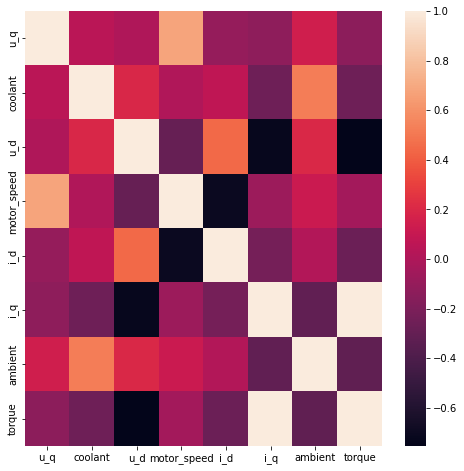

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df_features.corr()
plt.figure(figsize = (8,8))
sns.heatmap(corr)

### Distribution of features

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

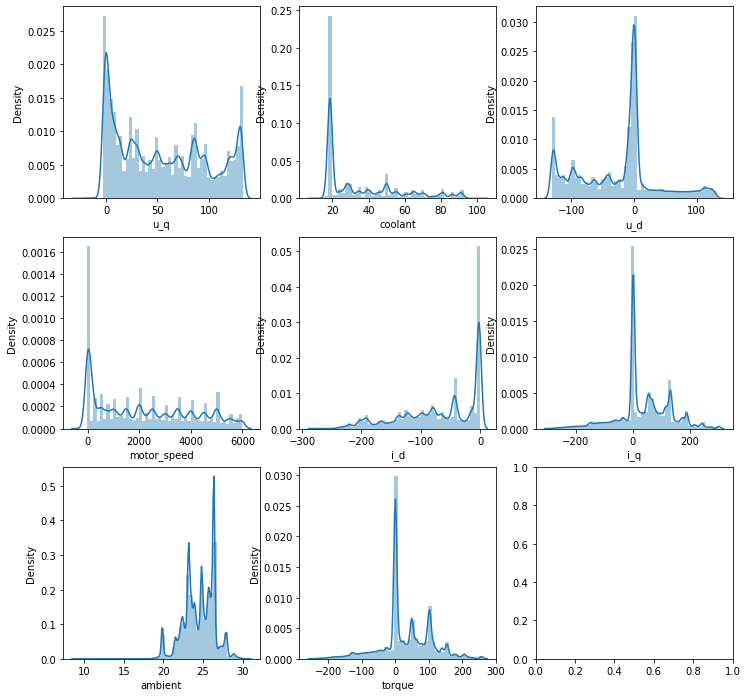

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

n_cols = 3
n_rows = np.ceil(df_features.shape[1] / n_cols).astype(int)

# create a subplot
fig, axes = plt.subplots(nrows = n_rows, ncols = n_cols, 
                         figsize = (4*n_cols, 4*n_rows))

for i, column in enumerate(df_features.columns):
  sns.distplot(df_features[column], ax=axes[i//n_cols, i%n_cols])